# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        print(n_units)
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    output = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output])
    return model

In [6]:
## 超參數設定
# 比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
BATCH_SIZE = 256
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
MOMENTUM = 0.95

In [8]:
results = {}
# SGD
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f & OPT = SGD" %(lr))
    model = build_mlp(x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=opt)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    # save result...
    train_loss = model.history.history["loss"]
    val_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    val_acc = model.history.history["val_accuracy"]
    
    name = "exp-lr-%s-opt-SGD" %str(lr)
    results[name] = {'train-loss': train_loss,
                             'valid-loss': val_loss,
                             'train-acc': train_acc,
                             'valid-acc': val_acc}

Experiment with LR = 0.100000 & OPT = SGD
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50


Epoch 49/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4144 - accuracy: 0.5029 - val_loss: 1.6791 - val_accuracy: 0.4321
Epoch 50/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4218 - accuracy: 0.5019 - val_loss: 1.7200 - val_accuracy: 0.4243
Experiment with LR = 0.010000 & OPT = SGD
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________

Epoch 47/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.3914 - accuracy: 0.8599 - val_loss: 2.2098 - val_accuracy: 0.5220
Epoch 48/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.3898 - accuracy: 0.8612 - val_loss: 2.2653 - val_accuracy: 0.5094
Epoch 49/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.3796 - accuracy: 0.8632 - val_loss: 2.2405 - val_accuracy: 0.5260
Epoch 50/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.3734 - accuracy: 0.8659 - val_loss: 2.3071 - val_accuracy: 0.5243
Experiment with LR = 0.001000 & OPT = SGD
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______

Epoch 45/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9384 - accuracy: 0.6711 - val_loss: 1.3518 - val_accuracy: 0.5324
Epoch 46/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9278 - accuracy: 0.6753 - val_loss: 1.4787 - val_accuracy: 0.5020
Epoch 47/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9111 - accuracy: 0.6823 - val_loss: 1.4163 - val_accuracy: 0.5227
Epoch 48/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.8984 - accuracy: 0.6845 - val_loss: 1.4457 - val_accuracy: 0.5148
Epoch 49/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.8927 - accuracy: 0.6887 - val_loss: 1.3799 - val_accuracy: 0.5321
Epoch 50/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.8845 - accuracy: 0.6911 - val_loss: 1.3869 - val_accuracy: 0.5322


In [9]:
# RMSprop
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f & OPT = RMSprop" %(lr))
    model = build_mlp(x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=opt)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    # save result...
    train_loss = model.history.history["loss"]
    val_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    val_acc = model.history.history["val_accuracy"]
    
    name = "exp-lr-%s-opt-RMSprop" %str(lr)
    results[name] = {'train-loss': train_loss,
                             'valid-loss': val_loss,
                             'train-acc': train_acc,
                             'valid-acc': val_acc}

Experiment with LR = 0.100000 & OPT = RMSprop
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1

Epoch 49/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3078 - accuracy: 0.1026 - val_loss: 2.3105 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3076 - accuracy: 0.0993 - val_loss: 2.3151 - val_accuracy: 0.1000
Experiment with LR = 0.010000 & OPT = RMSprop
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
___________________________________

Epoch 47/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8023 - accuracy: 0.3290 - val_loss: 1.8385 - val_accuracy: 0.3147
Epoch 48/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8037 - accuracy: 0.3294 - val_loss: 2.0303 - val_accuracy: 0.2715
Epoch 49/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7996 - accuracy: 0.3296 - val_loss: 1.8023 - val_accuracy: 0.3207
Epoch 50/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7987 - accuracy: 0.3275 - val_loss: 1.8614 - val_accuracy: 0.3063
Experiment with LR = 0.001000 & OPT = RMSprop
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___

Epoch 45/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.8228 - accuracy: 0.7044 - val_loss: 1.8453 - val_accuracy: 0.4925
Epoch 46/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.8121 - accuracy: 0.7099 - val_loss: 1.9538 - val_accuracy: 0.4844
Epoch 47/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.7977 - accuracy: 0.7119 - val_loss: 1.8585 - val_accuracy: 0.4897
Epoch 48/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.7852 - accuracy: 0.7182 - val_loss: 1.9288 - val_accuracy: 0.4542
Epoch 49/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.7774 - accuracy: 0.7214 - val_loss: 1.9963 - val_accuracy: 0.4842
Epoch 50/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.7664 - accuracy: 0.7253 - val_loss: 1.9660 - val_accuracy: 0.4620


In [11]:
# AdaGrad
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f & OPT = AdaGrad" %(lr))
    model = build_mlp(x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=opt)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    # save result...
    train_loss = model.history.history["loss"]
    val_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    val_acc = model.history.history["val_accuracy"]
    
    name = "exp-lr-%s-opt-Adagrad" %str(lr)
    results[name] = {'train-loss': train_loss,
                             'valid-loss': val_loss,
                             'train-acc': train_acc,
                             'valid-acc': val_acc}

Experiment with LR = 0.100000 & OPT = AdaGrad
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1

Epoch 49/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4308 - accuracy: 0.4891 - val_loss: 1.5499 - val_accuracy: 0.4496
Epoch 50/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4217 - accuracy: 0.4917 - val_loss: 1.5466 - val_accuracy: 0.4542
Experiment with LR = 0.010000 & OPT = AdaGrad
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
___________________________________

Epoch 47/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.0555 - accuracy: 0.6293 - val_loss: 1.3867 - val_accuracy: 0.5209
Epoch 48/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.0488 - accuracy: 0.6336 - val_loss: 1.4043 - val_accuracy: 0.5213
Epoch 49/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.0425 - accuracy: 0.6358 - val_loss: 1.3710 - val_accuracy: 0.5258
Epoch 50/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.0350 - accuracy: 0.6390 - val_loss: 1.4061 - val_accuracy: 0.5185
Experiment with LR = 0.001000 & OPT = AdaGrad
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___

Epoch 45/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.2671 - accuracy: 0.5599 - val_loss: 1.4014 - val_accuracy: 0.5029
Epoch 46/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.2627 - accuracy: 0.5614 - val_loss: 1.3822 - val_accuracy: 0.5056
Epoch 47/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.2577 - accuracy: 0.5644 - val_loss: 1.3969 - val_accuracy: 0.5056
Epoch 48/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.2546 - accuracy: 0.5656 - val_loss: 1.3690 - val_accuracy: 0.5162
Epoch 49/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.2493 - accuracy: 0.5667 - val_loss: 1.3952 - val_accuracy: 0.5075
Epoch 50/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.2458 - accuracy: 0.5690 - val_loss: 1.3951 - val_accuracy: 0.5076


In [12]:
# Adam
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f & OPT = AdaGrad" %(lr))
    model = build_mlp(x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.Adam(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=opt)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    # save result...
    train_loss = model.history.history["loss"]
    val_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    val_acc = model.history.history["val_accuracy"]
    
    name = "exp-lr-%s-opt-Adam" %str(lr)
    results[name] = {'train-loss': train_loss,
                             'valid-loss': val_loss,
                             'train-acc': train_acc,
                             'valid-acc': val_acc}

Experiment with LR = 0.100000 & OPT = AdaGrad
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1

Epoch 49/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.3062 - accuracy: 0.0996 - val_loss: 2.3184 - val_accuracy: 0.0999
Epoch 50/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.3067 - accuracy: 0.1015 - val_loss: 2.3148 - val_accuracy: 0.0999
Experiment with LR = 0.010000 & OPT = AdaGrad
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
___________________________________

Epoch 47/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5329 - accuracy: 0.4487 - val_loss: 1.6228 - val_accuracy: 0.4264
Epoch 48/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5328 - accuracy: 0.4472 - val_loss: 1.5984 - val_accuracy: 0.4299
Epoch 49/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5394 - accuracy: 0.4459 - val_loss: 1.6043 - val_accuracy: 0.4282
Epoch 50/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5425 - accuracy: 0.4464 - val_loss: 1.7250 - val_accuracy: 0.3940
Experiment with LR = 0.001000 & OPT = AdaGrad
512
256
128
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___

Epoch 45/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.6935 - accuracy: 0.7535 - val_loss: 1.7227 - val_accuracy: 0.5121
Epoch 46/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.6637 - accuracy: 0.7634 - val_loss: 1.8068 - val_accuracy: 0.5125
Epoch 47/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.6427 - accuracy: 0.7704 - val_loss: 1.7828 - val_accuracy: 0.5136
Epoch 48/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.6416 - accuracy: 0.7699 - val_loss: 1.7700 - val_accuracy: 0.5156
Epoch 49/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.6254 - accuracy: 0.7767 - val_loss: 1.8224 - val_accuracy: 0.5216
Epoch 50/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.6204 - accuracy: 0.7777 - val_loss: 1.8345 - val_accuracy: 0.5196


In [15]:
results

{'exp-lr-0.1-opt-SGD': {'train-loss': [2.0548087087249756,
   1.7754415576171876,
   1.74776319732666,
   1.7046057897567748,
   1.6694256888580323,
   1.6488727339935303,
   1.6320911679840089,
   1.6194213220977782,
   1.6212656949615478,
   1.5988646196746825,
   1.5950844795989991,
   1.58500548248291,
   1.5912244568252563,
   1.5793980801010132,
   1.5663886252212524,
   1.562698892211914,
   1.5500181798171997,
   1.541436072769165,
   1.5336369478988647,
   1.5341217770385742,
   1.5345884090423585,
   1.5261653203582763,
   1.5185251537704467,
   1.5242558013916017,
   1.5164338250350953,
   1.5115650183868408,
   1.5048860900115968,
   1.4964520516204833,
   1.500701470413208,
   1.4909519234466553,
   1.4794026222991943,
   1.4854986529541017,
   1.4841299878692626,
   1.469326046218872,
   1.4698661129379273,
   1.4621266816329956,
   1.4721758574676513,
   1.469955594215393,
   1.4498886008453369,
   1.4458223410034179,
   1.4503244808197022,
   1.4507812717437745,
   1.44

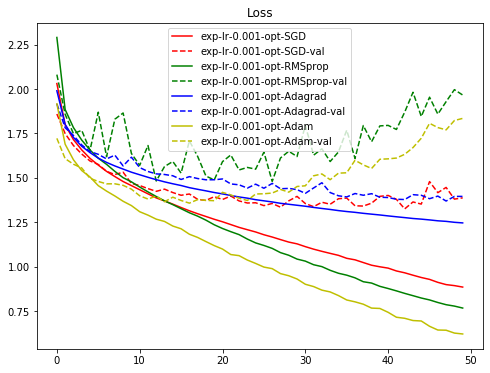

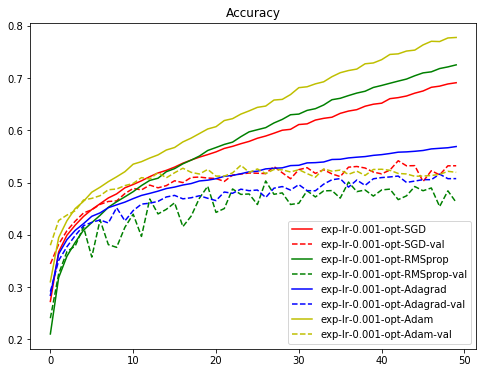

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8, 6))
opt_all = ['SGD', 'RMSprop', 'Adagrad', 'Adam']

for i, opt in enumerate(opt_all):
    cond = "exp-lr-0.001-opt-"+opt
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond+"-val", color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, opt in enumerate(opt_all):
    cond = "exp-lr-0.001-opt-"+opt
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond+"-val", color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [28]:
results.keys()

dict_keys(['exp-lr-0.1-opt-SGD', 'exp-lr-0.01-opt-SGD', 'exp-lr-0.001-opt-SGD', 'exp-lr-0.1-opt-RMSprop', 'exp-lr-0.01-opt-RMSprop', 'exp-lr-0.001-opt-RMSprop', 'exp-lr-0.1-opt-Adagrad', 'exp-lr-0.01-opt-Adagrad', 'exp-lr-0.001-opt-Adagrad', 'exp-lr-0.1-opt-Adam', 'exp-lr-0.01-opt-Adam', 'exp-lr-0.001-opt-Adam'])

In [1]:
# 0.1 難收斂！
opt_select = input('Please input optimizers: (SGD/RMSprop/Adagrad/Adam)')
color_bar = ["r", "g", "b"]
plt.figure(figsize=(8, 6))

for i, lr in enumerate(LEARNING_RATE):
    cond = "exp-lr-"+str(lr)+"-opt-"+ opt_select
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], '-', label=cond, c=color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], '--', label=cond+'-val', c=color_bar[i])
plt.title('Loss')
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))

for i, lr in enumerate(LEARNING_RATE):
    cond = "exp-lr-"+str(lr)+"-opt-" + opt_select
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], '-', label=cond, c=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], '--', label=cond+'-val', c=color_bar[i])
plt.title('Accuracy')

plt.legend()
plt.show()

Please input optimizers: (SGD/RMSprop/Adagrad/Adam)RMSprop


NameError: name 'plt' is not defined